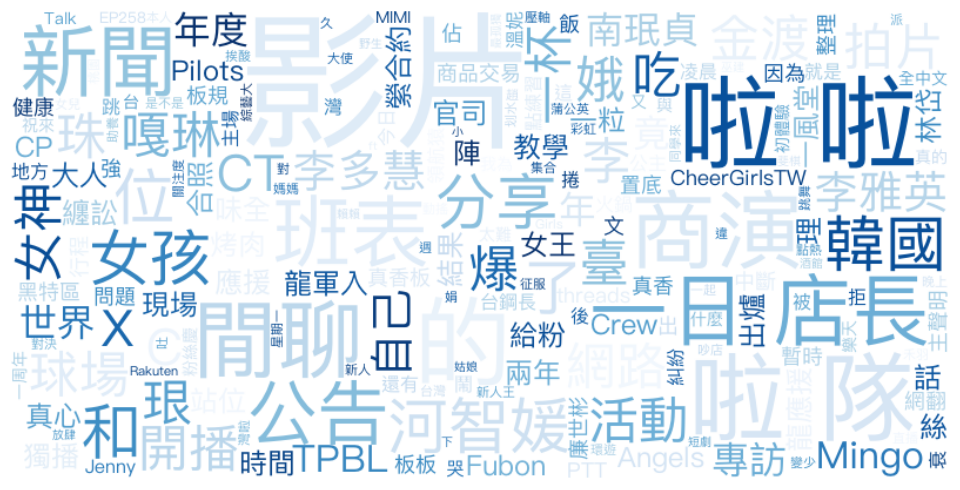

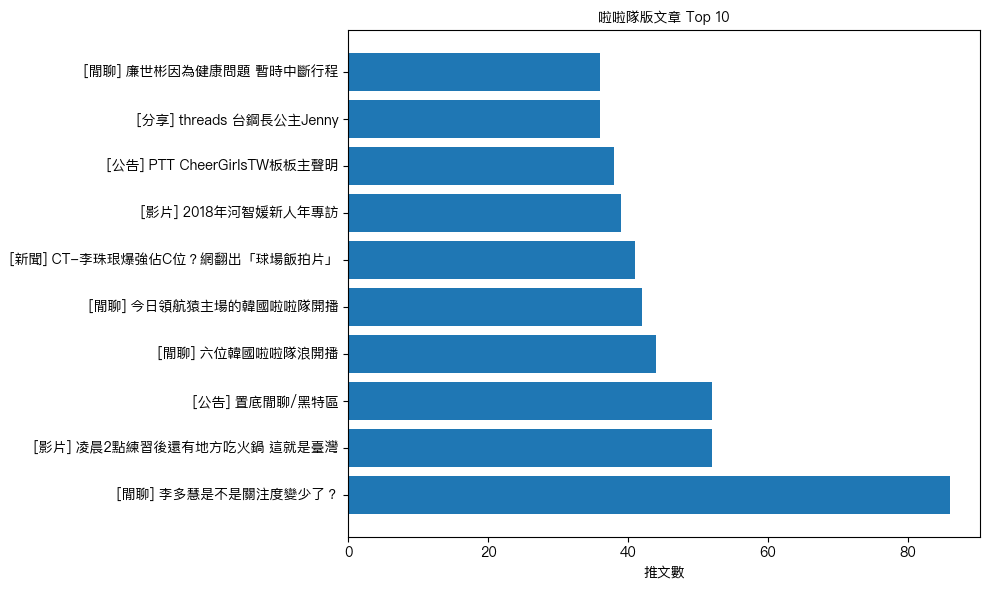

In [6]:
# 載入必要的套件
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import jieba
import os

# 設定字型（macOS 本機路徑）
font_path = '/Users/lincw/ptt-crawler-project/PingFang.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 字型
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 確保資料夾存在
os.makedirs("data", exist_ok=True)

# 讀取 CSV 檔案
df = pd.read_csv('data/cheergirls_articles_3pages.csv')

# jieba 斷詞處理
text = " ".join(df['標題'].dropna().apply(lambda x: " ".join(jieba.cut(str(x)))))

# 定義產生詞雲圖的函數
def generate_wordcloud(text, output_path):
    wordcloud = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white',
        colormap='Blues'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# 產生並儲存詞雲圖
generate_wordcloud(text, "data/wordcloud.png")

# 處理推文數值欄位
df['推文'] = pd.to_numeric(df['推文'], errors='coerce')

# 篩選前 10 篇最多推文的文章
top_push = df.sort_values(by='推文', ascending=False).head(10)

# 若標題過長，截斷成短標題以避免擁擠
top_push["短標題"] = top_push["標題"].apply(lambda x: x if len(x) <= 30 else x[:30] + "...")

# 畫長條圖
plt.figure(figsize=(10, 6))
plt.barh(top_push["短標題"], top_push["推文"])
plt.xlabel("推文數", fontproperties=font_prop)
plt.title("啦啦隊版文章 Top 10", fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.savefig("data/top_push.png")
plt.show()
